## Task 1 (Titanic prediction)


### 1) Installing dependencies

In [ ]:
!pip install pandas
!pip install seaborn
!pip install sklearn
!pip install numpy
!pip install matplot

### Importing dependencies

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# 2) Analysis

### 2.1) Importing Data

In [3]:
Titanic = pd.read_csv('Titanic.csv')

In [4]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 2.2) Cleaning Data

##### Checking duplicates values

In [5]:
Titanic.duplicated().sum()

0

So there is no duplicates values in our data

##### Checking null values

In [6]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As we can see there are null values in Age and Cabin

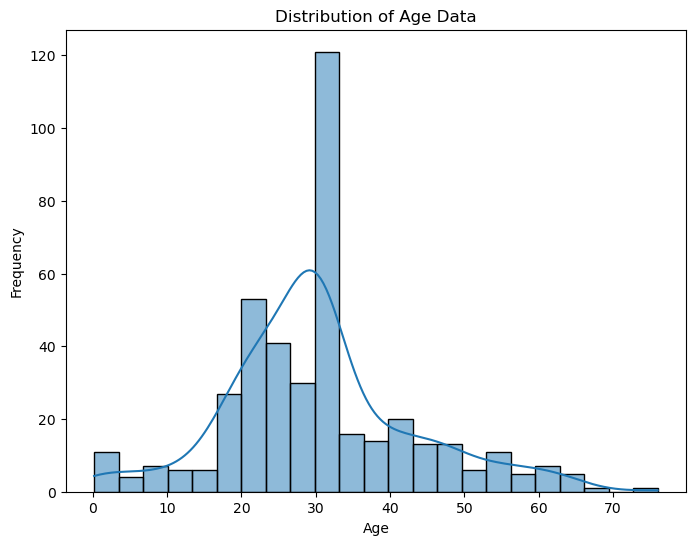

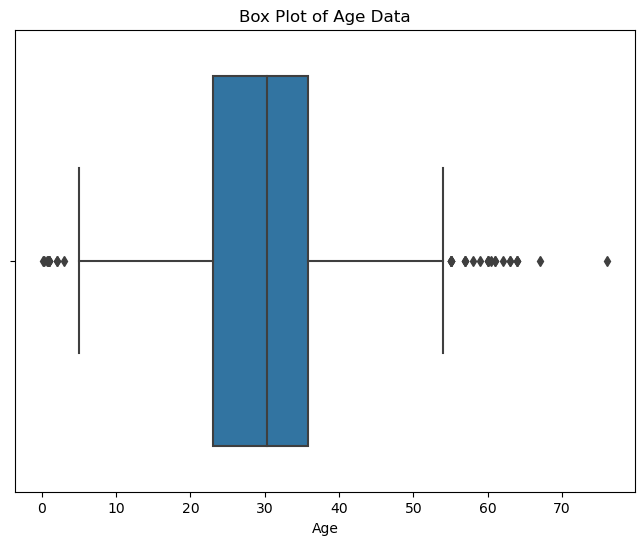

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(Titanic['Age'], kde=True)  # Use kde=True for a Kernel Density Estimate plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Data')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=Titanic['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Age Data')
plt.show()

So there are very less outliers and I will use mean here to replace the nan values

In [8]:
Titanic['Age'].fillna(value=Titanic['Age'].mean(),inplace=True)

##### Dealing with Fare columns

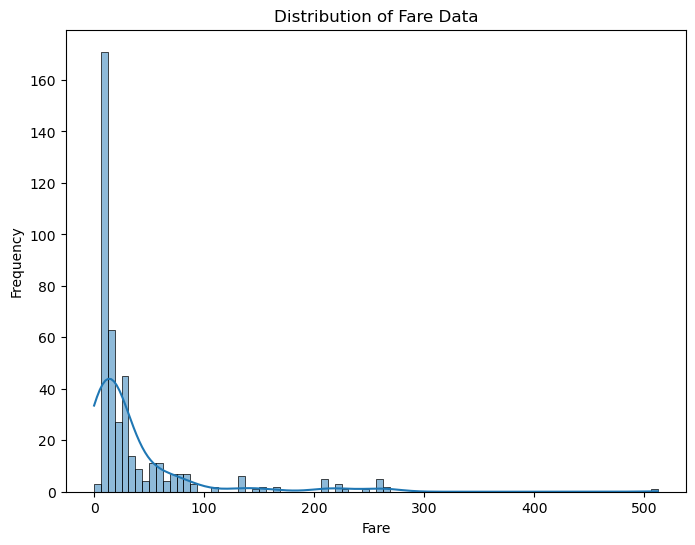

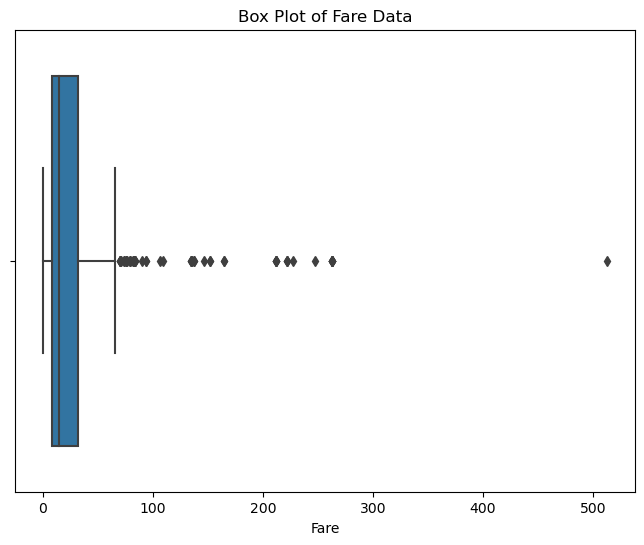

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(Titanic['Fare'], kde=True)  # Use kde=True for a Kernel Density Estimate plot
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Data')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=Titanic['Fare'])
plt.xlabel('Fare')
plt.title('Box Plot of Fare Data')
plt.show()

So there are so many outliers and we should use median

In [11]:
Titanic['Fare'].fillna(value=Titanic['Fare'].median(),inplace=True)

So there are lots of nan values in Cabin column so revoming it is the best option and we don't need Name column too so removing that too

##### removing columns which is not required.

In [12]:
Titanic.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

In [13]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

##### Data Types

In [14]:
Titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

##### Changing Data Types and Encoding

In [16]:
Titanic['Sex'] = LabelEncoder().fit_transform(Titanic['Sex'])
Titanic['Embarked'] = LabelEncoder().fit_transform(Titanic['Embarked'])

In [17]:
Titanic   (it is clean data and ready for model building)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.50000,0,0,7.8292,1
1,893,1,3,0,47.00000,1,0,7.0000,2
2,894,0,2,1,62.00000,0,0,9.6875,1
3,895,0,3,1,27.00000,0,0,8.6625,2
4,896,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,30.27259,0,0,8.0500,2
414,1306,1,1,0,39.00000,0,0,108.9000,0
415,1307,0,3,1,38.50000,0,0,7.2500,2
416,1308,0,3,1,30.27259,0,0,8.0500,2


### 3) Creating models


### a) Splitting Data

In [31]:
x = Titanic.drop(['Survived'],axis=1)
y= Titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

### b ) Model building

#### i) Random Forest

In [36]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
rand_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rand_acc:.2f}%")

Accuracy: 1.00%


#### ii) K-NN

In [41]:
model2 = KNeighborsClassifier(n_neighbors = 9)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred2)
print("Accuracy:", knn_acc)

Accuracy: 0.6666666666666666


C:\Users\kajal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
best_models = pd.DataFrame({
    'Model': ['Random Forest Classification','K-Neighbor Classification'],
    'Score': [rand_acc,knn_acc]
})
data = best_models.sort_values(by='Score', ascending=False)
data1 = data.set_index('Score')
data1

,Model
Score,
1.000000,Random Forest Classification
0.666667,K-Neighbor Classification
